# LaVague Test Runner

In this notebook, I'll use the `lavague-tests` package to compare LaVague agents using OpenAI, Anthropic & our FireWorks API configuration (Llama3.1 405B, Fireworks default embedding model + OpenAI gpt4-o as the multi-modal model).

The LaVague test runner compares agents ability to reach a set objective on the following sites:
- Google
- YouTube
- Reddit
- HuggingFace
- Wilkipedia
- New York Times
- Amazon
- A simple static site
- Accuweather

You can add more tests to the test runner, by adding new folders within the `lavague-tests/sites` folder containing a `yaml` test config file. More details on how to do this can be found [here](https://docs.lavague.ai/en/latest/docs/learn/testing/).

First we need to install LaVague and the `lavague-tests` package.

In [4]:
!pip install lavague lavague-tests

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.3/194.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.1 MB/s eta 0:00:00
   ━━━

The test runner should be run from the root of the LaVague repo.

In [6]:
import os
!git clone https://github.com/lavague-ai/LaVague
os.chdir("LaVague")

Cloning into 'LaVague'...
remote: Enumerating objects: 9155, done.
remote: Counting objects: 100% (1918/1918), done.
remote: Compressing objects: 100% (717/717), done.
remote: Total 9155 (delta 1361), reused 1496 (delta 1117), pack-reused 7237
Receiving objects: 100% (9155/9155), 92.76 MiB | 23.29 MiB/s, done.
Resolving deltas: 100% (5301/5301), done.


## Testing LaVague with OpenAI

In this section we will test a LaVague agent using out OpenAI default configuration which uses `gpt-4o` as the World Model (multi-modal) and Action Engine LLM, plus the `text-embedding-3-small` embedding model.

First of all, we will need to set out OPENAI_API_KEY environment variable.

In [7]:
# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

OpenAI is our default configuration, so we can test LaVague with OpenAI's gpt-4o by running the default `lavague-tests` command.

In [4]:
!lavague-test

/usr/local/lib/python3.10/dist-packages/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
2024-07-29 16:08:07,321 - INFO - Screenshot folder cleared
2024-07-29 16:08:14,586 - INFO - Thoughts:
- The current screenshot shows the documentation page of Hugging Face.
- The objective is to go on the quicktour of PEFT.
- PEFT is listed as one of the documentation options on the page.
- The next step is to click on the 'PEFT' link to navigate to its documentation.

Next engine: Navigation Engine
Instruction: Click on 'PEFT' in the documentation list.
2024-07-29 16:08:33,487 - INFO - Thoughts:
- The current screenshot shows the PEFT documentation page on Hugging Face.
- The objective is to go on the quicktour of PEFT.
- There is a 'Quicktour' link visible in the left sidebar under the 'PEFT' section.
- The next step should be to click on the 'Quicktour' link to proceed with 

*⚠️* Note that the cost information displayed are estimates and you should refer to your provider's consumption data for precise information.

## Testing LaVague with Anthropic

Let's now see how LaVague performs with our LaVague Anthropic Context (a built-in Anthropic configuration). This uses `claude-3-opus-20240229` as the World Model (multi-modal) and Action Engine LLM, plus OpenAI's `text-embedding-3-small` embedding model, since Anthropic don't have their own embedding model.

First, we'll download the Anthropic Context and set our Anthropic API key environment variable.

In [1]:
!pip install lavague-contexts-anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 565.5 kB/s eta 0:00:00
INFO: pip is looking at multiple versions of llama-index-llms-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-index-program-openai to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.7/862.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [3]:
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["ANTHROPIC_API_KEY"] = userdata.get('ANTHROPIC_API_KEY')
else:
    os.environ["ANTHROPIC_API_KEY"] = os.getenv('ANTHROPIC_API_KEY')

We can now run the LaVague test runner with our Anthropic Context by specifying the Anthropic Context file available in `lavague-tests/contexts`:

In [8]:
!lavague-test -c lavague-tests/contexts/anthropic_context.py

/usr/local/lib/python3.10/dist-packages/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
2024-07-30 07:02:08,014 - INFO - Screenshot folder cleared
127.0.0.1 - - [30/Jul/2024 07:02:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jul/2024 07:02:08] code 404, message File not found
127.0.0.1 - - [30/Jul/2024 07:02:08] "GET /favicon.ico HTTP/1.1" 404 -
2024-07-30 07:02:12,007 - INFO - Thoughts:
- The current screenshot shows a simple webpage with a title "Welcome to the Main Page".
- There is a clear instruction on the page that says "Click the link below to navigate to the menu."
- Below this instruction, there is a hyperlink that says "See the menu".
- The objective is to go to the menu, which aligns perfectly with the link provided on the page.
- The next logical step is to click on this link to navigate to the menu.

Next engine: Navigation Engine

Instruction: Click

## Testing LaVague with our Fireworks Context (Llama3.1 405B)

Let's now see how LaVague performs with our LaVague Fireworks Context. This uses still uses OpenAI's gpt-4o as the World Model (multi-modal) but combines it with Llama3.1 405B as the Action Engine LLM (via Fireworks API), plus Firework's default embedding model.

Again, we'll need to download the Fireworks Context and set our Fireworks API key environment variable.

In [9]:
!pip install lavague-contexts-fireworks

In [10]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["FIREWORKS_API_KEY"] = userdata.get('FIREWORKS_API_KEY')
else:
    os.environ["FIREWORKS_API_KEY"] = os.getenv('FIREWORKS_API_KEY')

Now we can run the LaVague test runner with our Fireworks configuration using our `lavague-tests/contexts/fireworks_context.py` file.

In [13]:
!lavague-test -c lavague-tests/contexts/fireworks_context.py

2024-07-29 16:26:46,928 - INFO - Screenshot folder cleared
2024-07-29 16:26:52,164 - INFO - Thoughts:
- The current screenshot shows the documentation page of Hugging Face.
- The objective is to go on the quicktour of PEFT.
- PEFT is listed as one of the documentation sections.
- The next step should involve clicking on the 'PEFT' section to proceed to the quicktour.

Next engine: Navigation Engine
Instruction: Click on 'PEFT' in the documentation sections.
2024-07-29 16:27:13,985 - INFO - Thoughts:
- The current screenshot shows the PEFT documentation page on Hugging Face.
- The objective is to go on the quicktour of PEFT.
- There is a 'Quicktour' link visible in the left sidebar under the 'Getting Started' section.
- Clicking on the 'Quicktour' link should take us to the desired page.

Next engine: Navigation Engine
Instruction: Click on 'Quicktour' in the left sidebar under the 'Getting Started' section.
2024-07-29 16:27:29,644 - INFO - Thoughts:
- The current screenshot shows the '

## Testing LaVague with our Gemini Context

Finally, let's see how LaVague performs with our LaVague Gemini Context.

This Context uses:
- `gemini-1.5-flash-latest` as the Action Engine LLM
- `gemini-1.5-pro-latest` as the World Model multi-modal LLM
- Gemini's `text-embedding-004` as the embedding model

Again, we'll first need to download the Gemini Context and set our Gemini API key environment variable.

In [10]:
!pip install lavague-contexts-gemini

INFO: pip is looking at multiple versions of llama-index-embeddings-gemini to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of llama-index-llms-gemini to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.4/137.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.6
    Uninstalling google-ai-generativelanguage-0.6.6:
      Successfully uninstalled google-ai-generativelanguage-0.6.6
  Attempting uninstall: google-generativeai


In [12]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')
else:
    os.environ["GOOGLE_API_KEY"] = os.getenv('GOOGLE_API_KEY')

Let's now run `lavague-test` with Gemini

In [20]:
!lavague-test -c lavague-tests/contexts/gemini_context.py

/usr/local/lib/python3.10/dist-packages/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
2024-07-30 07:51:22,176 - INFO - Screenshot folder cleared
127.0.0.1 - - [30/Jul/2024 07:51:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jul/2024 07:51:22] code 404, message File not found
127.0.0.1 - - [30/Jul/2024 07:51:22] "GET /favicon.ico HTTP/1.1" 404 -
2024-07-30 07:51:28,210 - INFO - Thoughts:
- The objective is to go to the menu.
- The screenshot shows a webpage with a welcome message and a clickable link labeled "See the menu".
- Clicking on this link will likely lead to the menu.
Next engine: Navigation Engine
Instruction: Click on the link labeled "See the menu". 

127.0.0.1 - - [30/Jul/2024 07:51:33] "GET /menu.html HTTP/1.1" 200 -
2024-07-30 07:51:36,953 - INFO - Thoughts:
- The objective is to go to the menu.
- The current tab is labeled "Menu" and the screenshot

## Comparing results



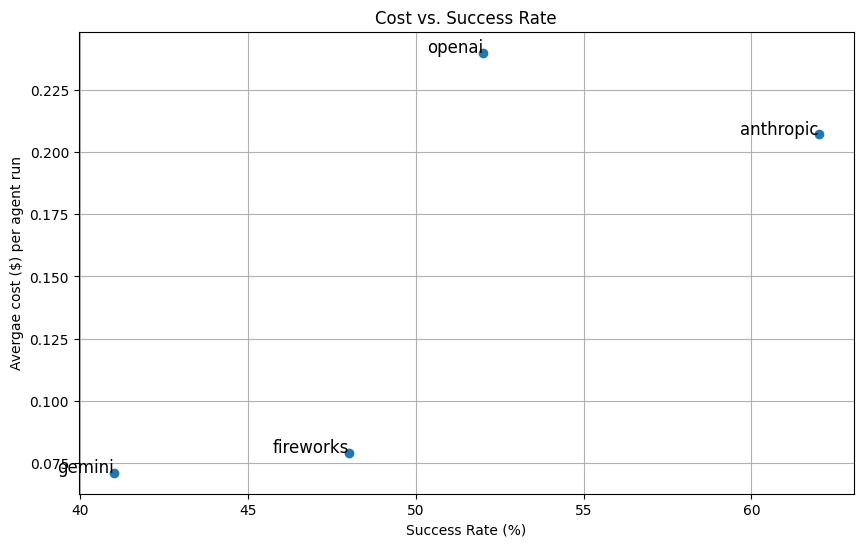

In [21]:
import matplotlib.pyplot as plt

# Fill with results from notebook
agent_runs = 10
gemini_runs = 7 # Gemini only ran 7 of 10 tests in this case - need to debug why it skipped three tests

openai_results=52
openai_cost=2.3994 / agent_runs
anthropic_results=62
anthropic_cost=2.0726 / agent_runs
fireworks_results=48
fireworks_cost=0.7916 / agent_runs
gemini_results=41
gemini_cost=0.4975  / gemini_runs

data = [
    {"name": "openai", "cost": openai_cost, "success_rate": openai_results},
    {"name": "anthropic", "cost": anthropic_cost, "success_rate": anthropic_results},
    {"name": "fireworks", "cost": fireworks_cost, "success_rate": fireworks_results},
    {"name": "gemini", "cost": gemini_cost, "success_rate": gemini_results}
]

# Extract data for plotting
names = [item["name"] for item in data]
costs = [item["cost"] for item in data]
success_rates = [item["success_rate"] for item in data]

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(success_rates, costs)

# Add labels for each point
for i, name in enumerate(names):
    plt.text(success_rates[i], costs[i], name, fontsize=12, ha='right')

# Labeling the axes
plt.xlabel("Success Rate (%)")
plt.ylabel("Avergae cost ($) per agent run")
plt.title("Cost vs. Success Rate")

# Display the plot
plt.grid(True)
plt.show()
